# Random Graph Models

This tutorial will introduce the following random graph models: 
 - Erdos-Reyni (ER)
 - Degree-corrected Erdos-Reyni (DCER)
 - Stochastic block model (SBM)
 - Degree-corrected stochastic block model (DCSBM)
 - Random dot product graph (RDPG)

## Load some data from _GraSPy_

For this example we will use the _Drosophila melanogaster_ larva right mushroom body connectome. Here we will consider a binarized, undirected version of the graph.

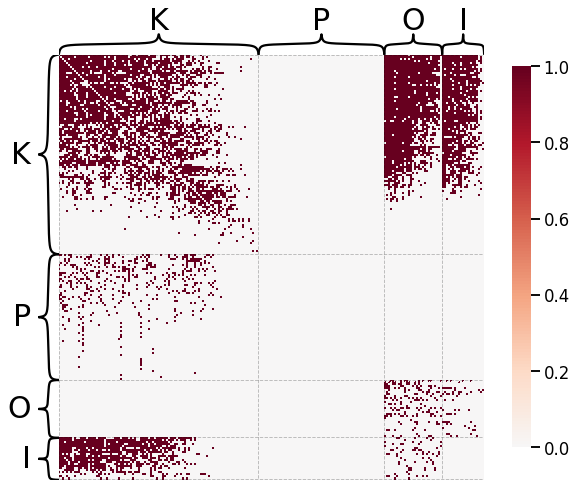

In [1]:
import numpy as np 
from graspy.datasets import load_drosophila_right
from graspy.plot import heatmap
from graspy.utils import binarize, symmetrize
from matplotlib import cm
import matplotlib as mpl

%matplotlib inline

adj, labels = load_drosophila_right(return_labels=True)
# adj = symmetrize(adj, method='avg')
adj = binarize(adj)
heatmap(adj, inner_hier_labels=labels, transform='simple-nonzero');

## Preliminaries

$n$ - the number of nodes in the graph

$A$ - $n \times n$ adjacency matrix

$P$ - $n \times n$ matrix of probabilities


For the class of models we will consider here, a graph (adjacency matrix) $A$ is sampled as follows:

$$A \sim Bernoulli(P)$$

While each model we will discuss follows this formulation, they differ in how the matrix $P$ is constructed. So, for each model, we will consider how to model $P_{ij}$, or the probability of connection between any node $i$ and $j$, with $i \neq j$ in this case (i.e. no "loops" are allowed for the sake of this tutorial).


------


### For each graph model we will show: 
- how the model is formulated 
- how to fit the model using GraSPy
- the P matrix that was fit by the model 
- a single sample from the fit model

## Erdos-Reyni (ER)
The Erdos-Reyni (ER) model is the simplest random graph model one could write down. We are interested in modeling the probability of an edge existing between any two nodes, $i$ and $j$. We denote this probability $P_{ij}$. For the ER model:

$$P_{ij} = p$$

for any combination of $i$ and $j$

This means that the one parameter $p$ is the overall probability of connection for any two nodes. 

ER "p" parameter: 0.1661046088739007


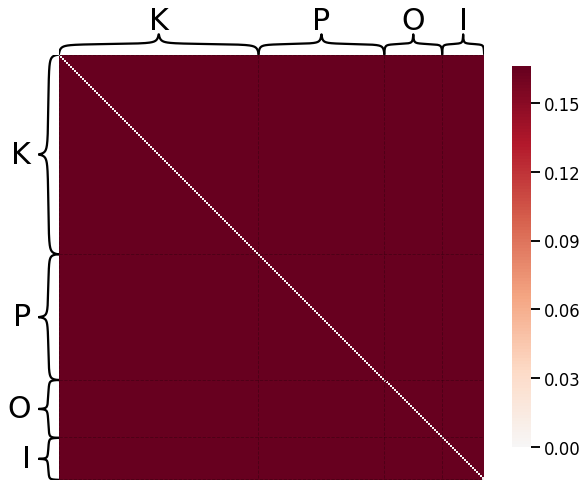

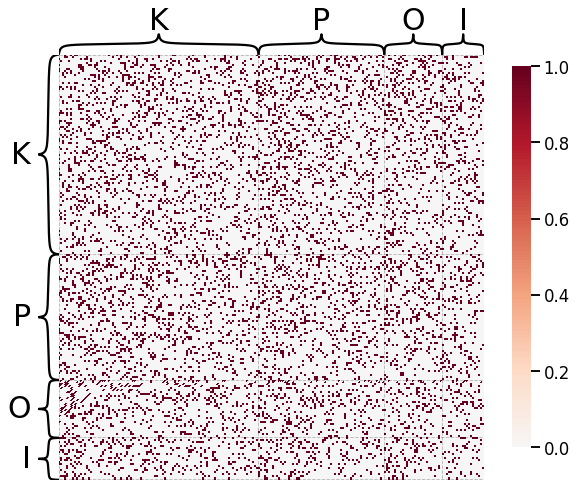

In [2]:
from graspy.models import EREstimator
er = EREstimator(directed=True,loops=False)
er.fit(adj)
print(f"ER \"p\" parameter: {er.p_}")
heatmap(er.p_mat_, inner_hier_labels=labels,)
heatmap(er.sample()[0], inner_hier_labels=labels,);

## Degree-corrected Erdos-Reyni (DCER)

A slightly more complicated variant of the ER model is the degree-corrected Erdos-Reyni model (DCER). Here, there is still a global parameter $p$ to specify relative connection probability between all edges. However, we add a promiscuity parameter $\theta_i$ for each node $i$ which specifies its expected degree relative to other nodes:

$$P_{ij} = \theta_i \theta_j p$$

so the probility of an edge from $i$ to $j$ is a function of the two nodes' degree-correction parameters, and the overall probability of an edge in the graph. 

ER "p" parameter: 7536.0


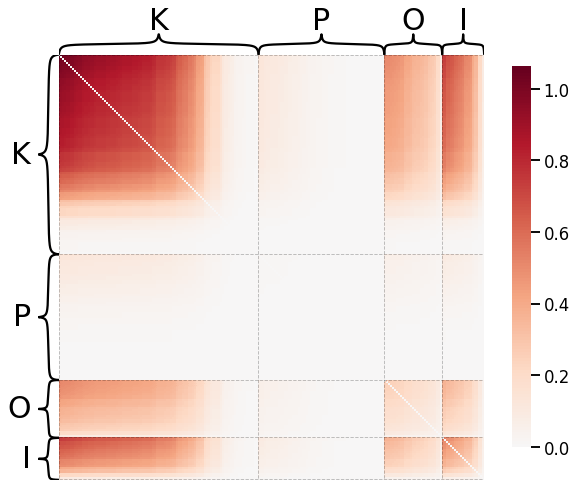

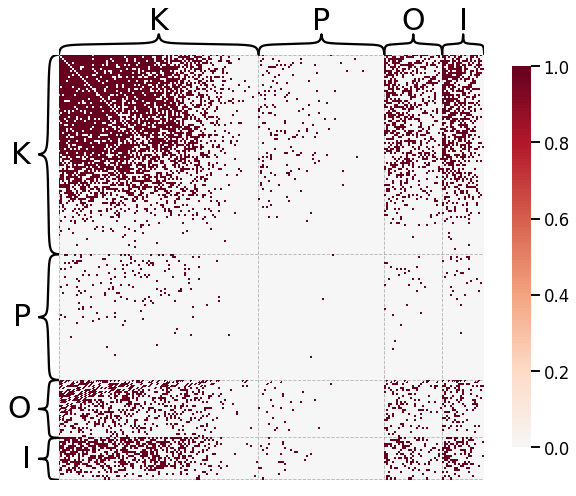

In [3]:
from graspy.models import DCEREstimator
dcer = DCEREstimator(directed=True,loops=False)
dcer.fit(adj)
print(f"ER \"p\" parameter: {dcer.p_}")
heatmap(dcer.p_mat_, inner_hier_labels=labels,);
heatmap(dcer.sample()[0], inner_hier_labels=labels,);

## Stochastic block model (SBM)
Under the stochastic block model (SBM), each node is modeled as belonging to a block (sometimes called a community or group). The probability of node $i$ connecting to node $j$ is simply a function of the block membership of the two nodes. Let $n$ be the number of nodes in the graph, then $\tau$ is a length $n$ vector which indicates the block membership of each node in the graph. Let $K$ be the number of blocks, then $B$ is a $K \times K$ matrix of block-block connection probabilities. 

$$P_{ij} = B_{\tau_i \tau_j}$$

SBM "B" matrix:
[[0.         0.38333333 0.11986864 0.        ]
 [0.44571429 0.3584     0.49448276 0.        ]
 [0.09359606 0.         0.20095125 0.        ]
 [0.         0.07587302 0.         0.        ]]


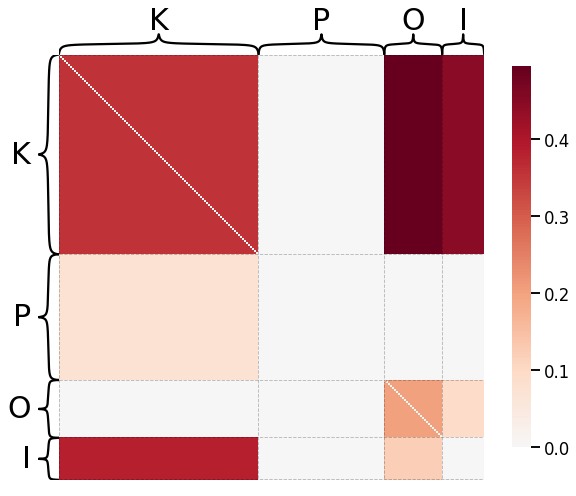

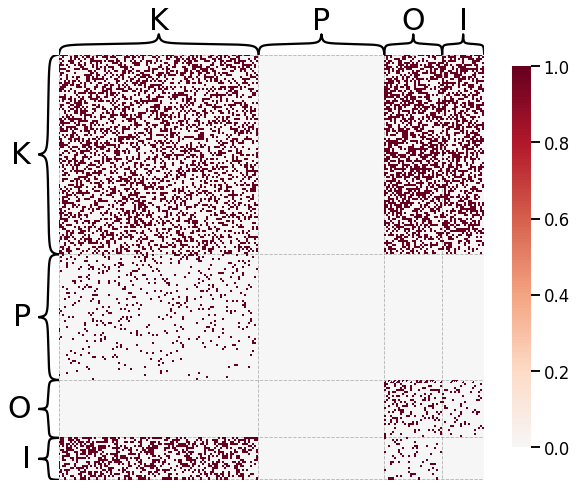

In [4]:
from graspy.models import SBEstimator
sbe = SBEstimator(directed=True,loops=False)
sbe.fit(adj, y=labels)
print("SBM \"B\" matrix:")
print(sbe.block_p_)
heatmap(sbe.p_mat_, inner_hier_labels=labels,)
heatmap(sbe.sample()[0], inner_hier_labels=labels,);

## Degree-corrected stochastic block model (DCSBM)
Just as we could add a degree-correction term to the ER model, so too can we modify the stochastic block model to allow for heterogeneous expected degrees. Again, we let $\theta$ be a length $n$ vector of degree correction parameters, and all other parameters remain as they were defined above for the SBM: 

$$P_{ij} = \theta_i \theta_j B_{\tau_i, \tau_j}$$

Note that the matrix $B$ may no longer represent true probabilities, becuase the addition of the $\theta$ vectors introduces a multiplicative constant that can be absorbed into the elements of $\theta$

DCSBM "B" matrix:
[[   0.  805.   73.    0.]
 [ 936. 3584. 1434.    0.]
 [  57.    0.  169.    0.]
 [   0.  478.    0.    0.]]


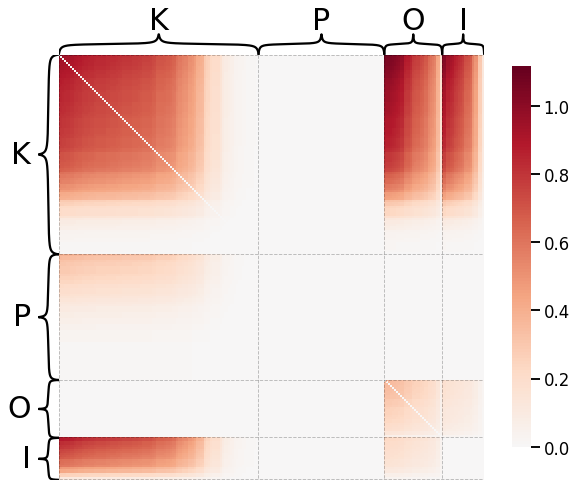

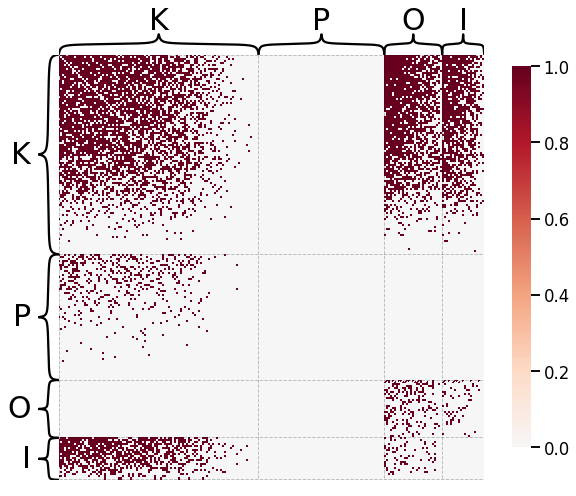

In [5]:
from graspy.models import DCSBEstimator
dcsbe = DCSBEstimator(directed=True,loops=False)
dcsbe.fit(adj, y=labels)
print("DCSBM \"B\" matrix:")
print(dcsbe.block_p_)
heatmap(dcsbe.p_mat_, inner_hier_labels=labels,)
heatmap(dcsbe.sample()[0], inner_hier_labels=labels,);

## Random dot product graph (RDPG)

Under the random dot product graph model, each node is assumed to have a "latent position" in some $d$-dimensional Euclidian space. This vector dictates that node's probability of connection to other nodes. For a given pair of nodes $i$ and $j$, the probability of connection is the dot product between their latent positions. If $x_i$ and $x_j$ are the latent positions of nodes $i$ and $j$, respectively:

$$P_{ij} = \langle x_i, x_j \rangle$$



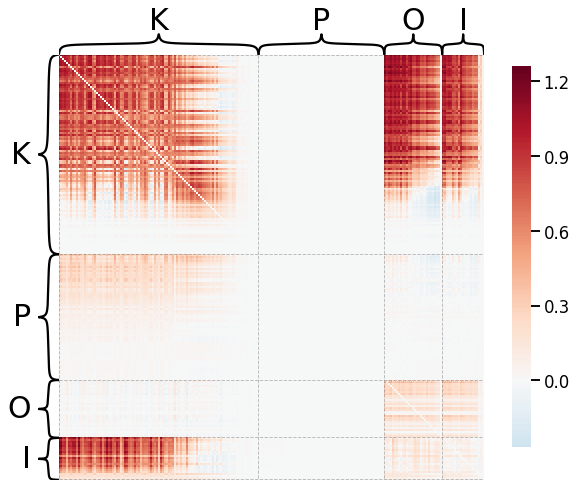

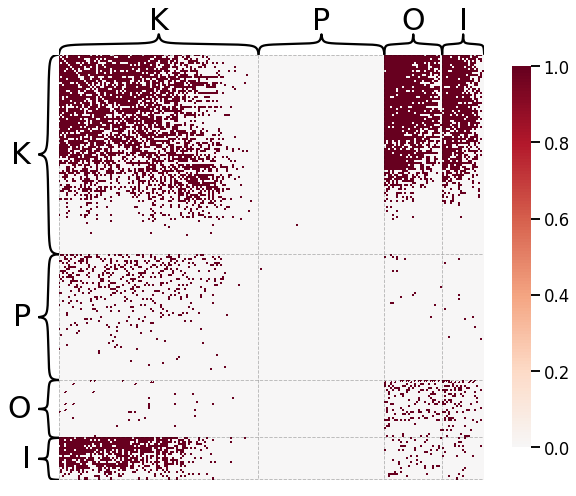

In [6]:
from graspy.models import RDPGEstimator
rdpge = RDPGEstimator(loops=False)
rdpge.fit(adj, y=labels)
heatmap(rdpge.p_mat_, inner_hier_labels=labels,)
heatmap(rdpge.sample()[0], inner_hier_labels=labels,);

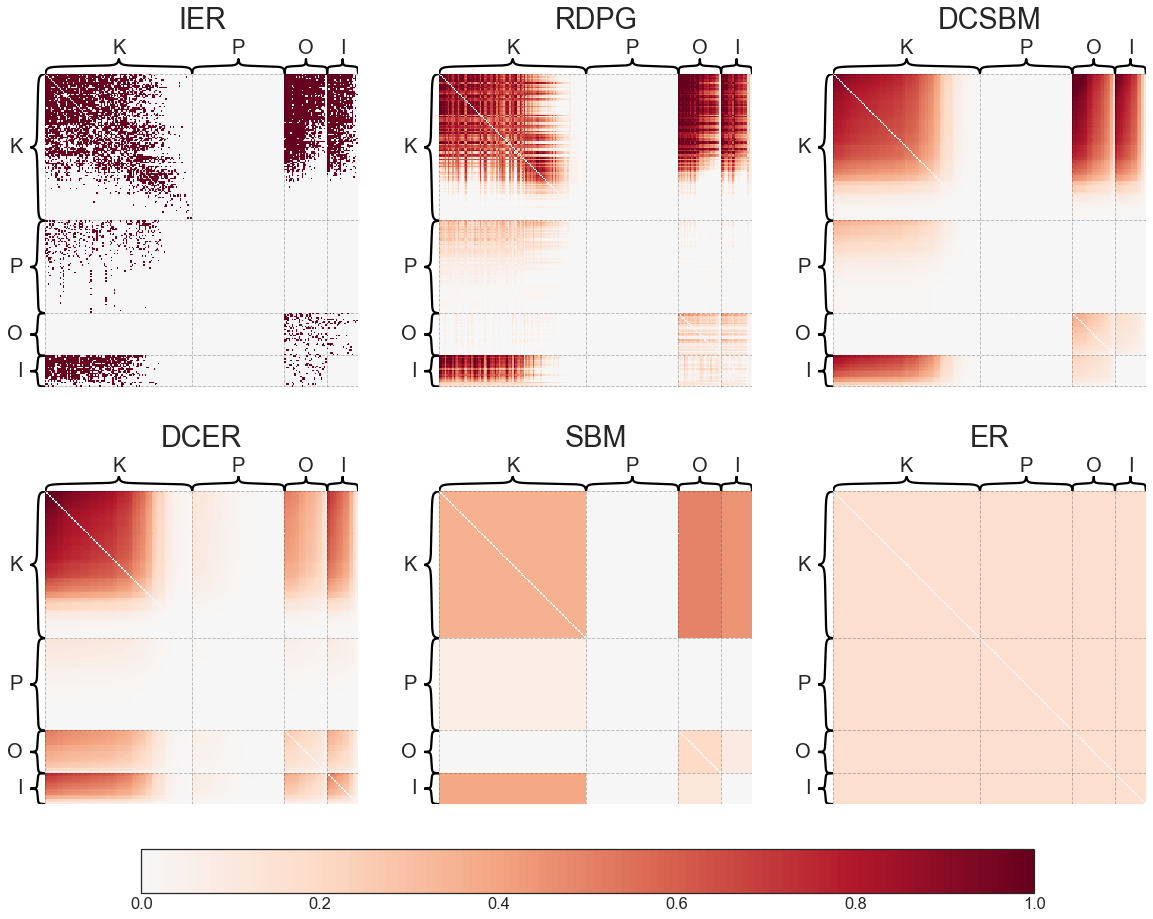

In [15]:
sns.set_context("talk")
plt.style.use("seaborn-white")


fig, axs = plt.subplots(2, 3, figsize=(20, 16))

# colormapping
cmap = cm.get_cmap("RdBu_r")
# cmap = cm.get_cmap(cmap)

center = 0
vmin = 0
vmax = 1
norm = mpl.colors.Normalize(0, 1)
cc = np.linspace(0.5, 1, 256) 
cmap = mpl.colors.ListedColormap(cmap(cc))

# heatmapping
heatmap_kws = dict(
    inner_hier_labels=labels,
    vmin=0,
    vmax=1,
    cbar=False,
    cmap=cmap,
    center=None,
    hier_label_fontsize=20,
    title_pad=45,
    font_scale=1.6,
)

models = [rdpge, dcsbe, dcer, sbe, er]
model_names = ["RDPG", "DCSBM","DCER", "SBM", "ER"]

heatmap(adj, ax=axs[0][0], title="IER", **heatmap_kws)
heatmap(models[0].p_mat_, ax=axs[0][1], title=model_names[0], **heatmap_kws)
heatmap(models[1].p_mat_, ax=axs[0][2], title=model_names[1], **heatmap_kws)
heatmap(models[2].p_mat_, ax=axs[1][0], title=model_names[2], **heatmap_kws)
heatmap(models[3].p_mat_, ax=axs[1][1], title=model_names[3], **heatmap_kws)
heatmap(models[4].p_mat_, ax=axs[1][2], title=model_names[4], **heatmap_kws)


# add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(dcsbe.p_mat_)
fig.colorbar(sm,
             ax=axs,
             orientation="horizontal",
             pad=0.04,
             shrink=0.8,
             fraction=0.08,
             drawedges=False)
plt.savefig("show_multiplot.pdf",
            format="pdf",
            facecolor="w",
            bbox_inches='tight')
# plt.show();

In [8]:
mse = []
for model in models:
    print(model)
    p_mat = model.p_mat_.copy()
    mse.append(np.linalg.norm(p_mat - adj)**2)
#     p_mat[p_mat > 1] = 1
#     p_mat[p_mat < 0] = 0
#     np.linalg.norm(p_mat - adj)**2

RDPGEstimator(ase_kws={}, diag_aug_weight=1, loops=False, n_components=None,
       plus_c_weight=1)
DCSBEstimator(cluster_kws={}, degree_directed=False, directed=True,
       embed_kws={}, loops=False, max_comm=10, min_comm=1,
       n_components=None)
DCEREstimator(degree_directed=False, directed=True, loops=False)
SBEstimator(cluster_kws={}, directed=True, embed_kws={}, loops=False,
      max_comm=10, min_comm=1, n_components=None)
EREstimator(directed=True, loops=False)


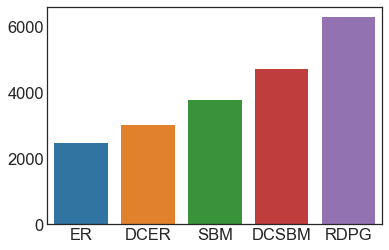

<Figure size 432x288 with 0 Axes>

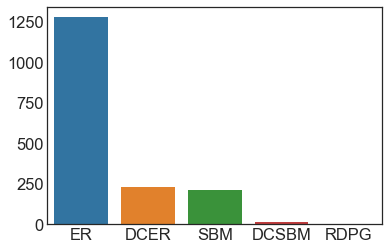

In [9]:
model_names = ["ER", "DCER", "SBM", "DCSBM", "RDPG"]
sns.barplot(x=model_names, y=mse)
plt.show()
plt.figure()
n_params = [e._n_parameters() for e in models]
sns.barplot(x=model_names, y=n_params)

RDPGEstimator(ase_kws={}, diag_aug_weight=1, loops=False, n_components=1,
       plus_c_weight=1)

RDPGEstimator(ase_kws={}, diag_aug_weight=1, loops=False, n_components=2,
       plus_c_weight=1)

RDPGEstimator(ase_kws={}, diag_aug_weight=1, loops=False, n_components=3,
       plus_c_weight=1)

RDPGEstimator(ase_kws={}, diag_aug_weight=1, loops=False, n_components=6,
       plus_c_weight=1)

RDPGEstimator(ase_kws={}, diag_aug_weight=1, loops=False, n_components=10,
       plus_c_weight=1)

RDPGEstimator(ase_kws={}, diag_aug_weight=1, loops=False, n_components=20,
       plus_c_weight=1)

RDPGEstimator(ase_kws={}, diag_aug_weight=1, loops=False, n_components=50,
       plus_c_weight=1)

RDPGEstimator(ase_kws={}, diag_aug_weight=1, loops=False, n_components=100,
       plus_c_weight=1)

RDPGEstimator(ase_kws={}, diag_aug_weight=1, loops=False, n_components=200,
       plus_c_weight=1)

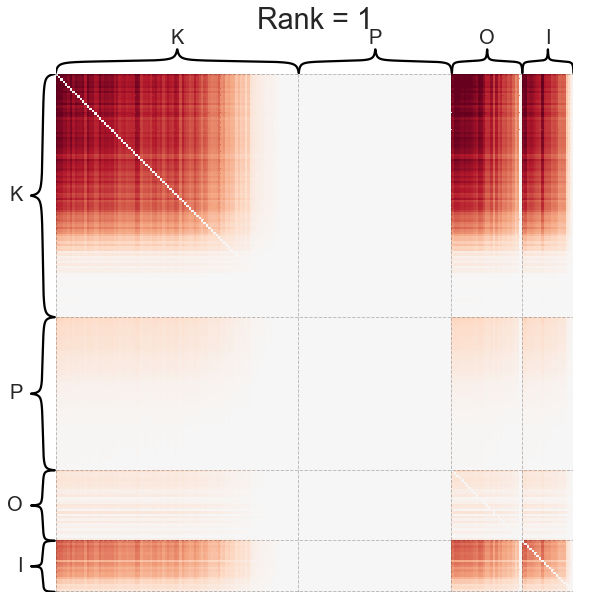

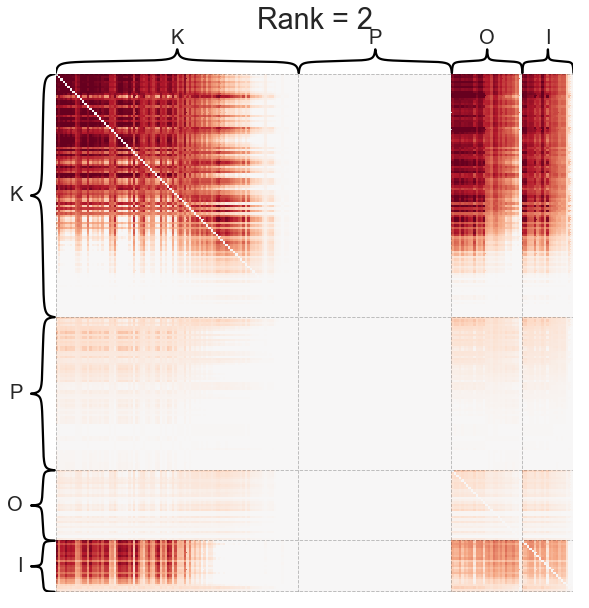

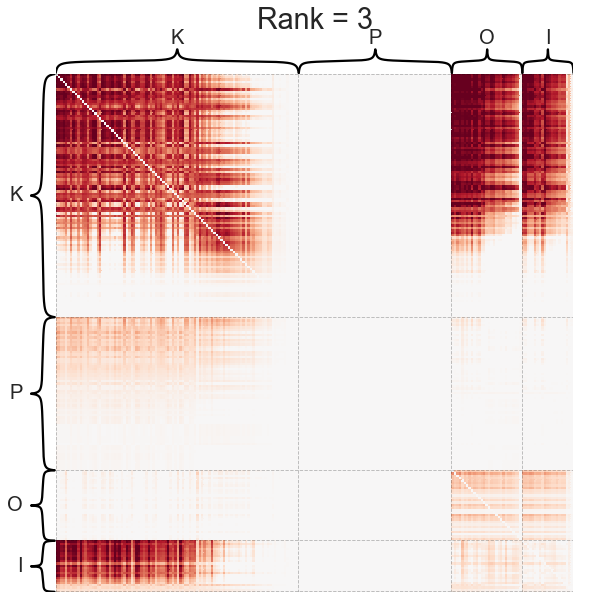

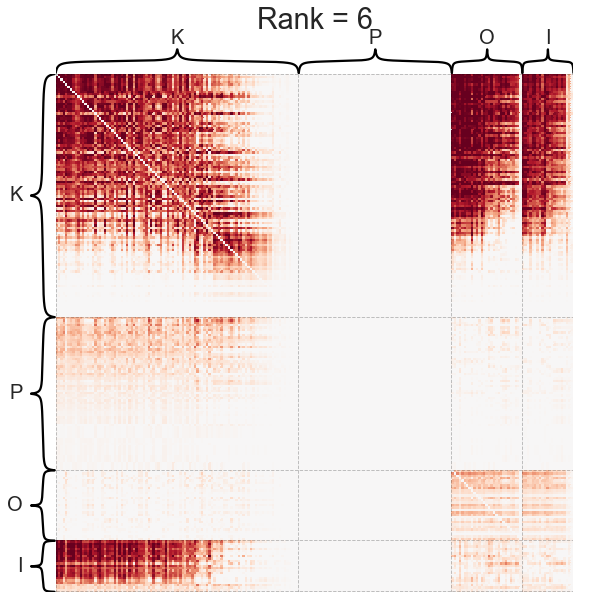

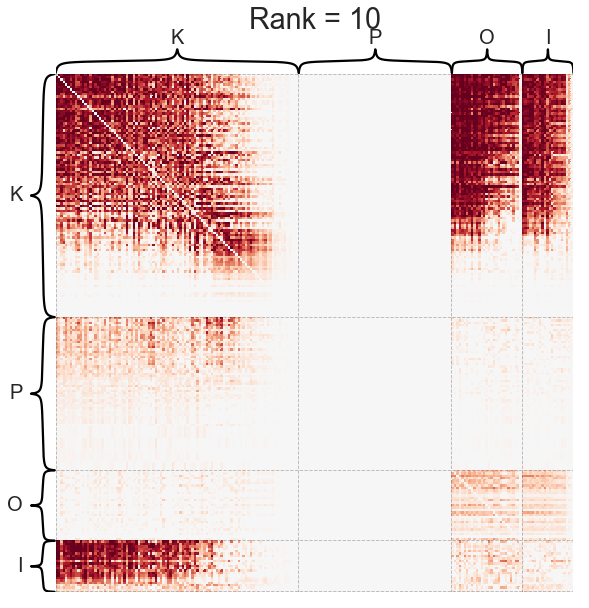

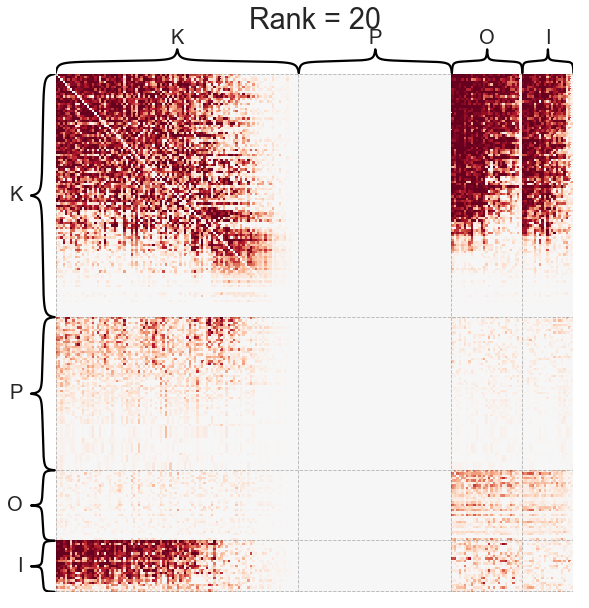

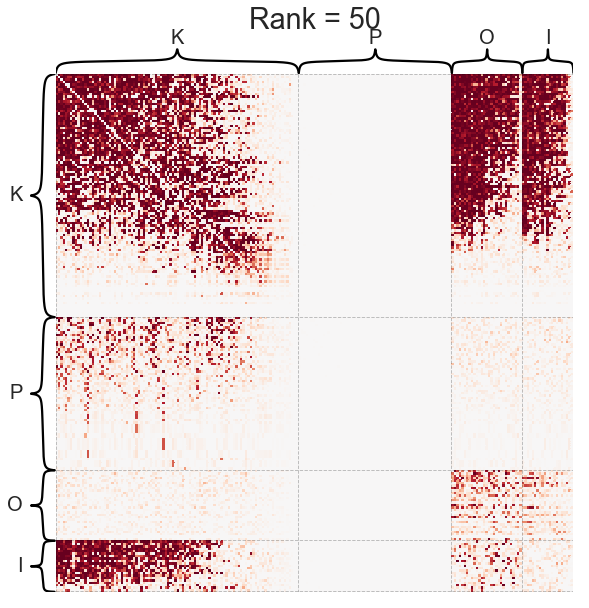

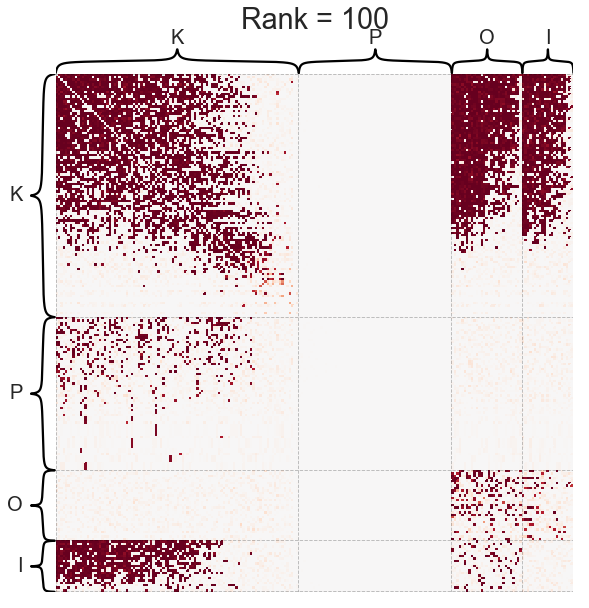

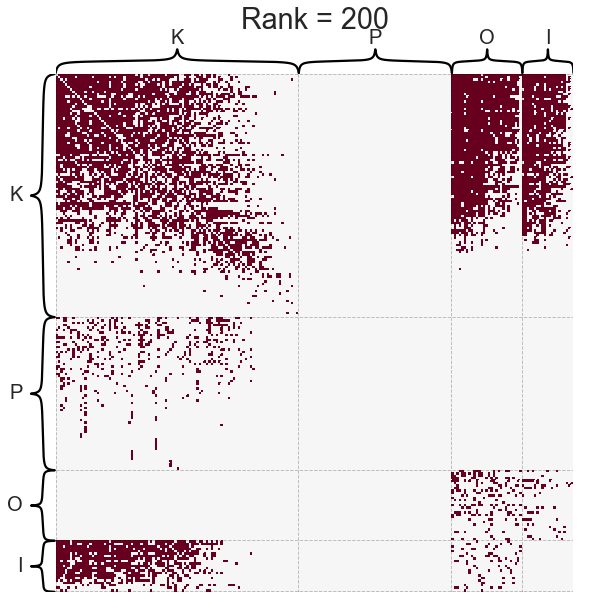

In [10]:
try_n_components = [1, 2, 3, 6, 10, 20, 50, 100, 200]
for n_components in try_n_components:
    estimator = RDPGEstimator(n_components=n_components, loops=False)
    estimator.fit(adj)
    heatmap(estimator.p_mat_, title=f'Rank = {n_components}', **heatmap_kws);


In [16]:
from graspy.embed import AdjacencySpectralEmbed
from graspy.utils import augment_diagonal
def supervised_RDPG(adj, labels, c=1, n_components=None):
    sbm = DCSBEstimator(directed=True, loops=False)
    sbm.fit(adj, y=labels)
    mod_adj = adj - c * sbm.p_mat_
#     rdpg = RDPGEstimator(loops=False, n_components=n_components)
#     rdpg.fit(mod_adj)
    ase = AdjacencySpectralEmbed(n_components=n_components)
    mod_adj = augment_diagonal(mod_adj)
    mod_adj += 1 / adj.size
    X, Y = ase.fit_transform(mod_adj)
    p_mat = X @ Y.T + c*sbm.p_mat_
    p_mat -= np.diag(np.diag(p_mat))
    return p_mat

n_components = 2

heatmap(srdpg_p_mat, **heatmap_kws)
heatmap(rdpge.p_mat_, **heatmap_kws)
# print(f'n_components = {n_components}')
# print('SRDPG: {}'.format(np.linalg.norm(srdpg_p_mat - adj)**2))
# print('RDPG: {}'.format());



plt.figure()

c_range = np.linspace(0, 1, 20)
n_components_range = range(1,10,1)
for n_components in n_components_range:
    srdpg_mses = []
    rdpge = RDPGEstimator(n_components=n_components, loops=False)
    rdpge.fit(adj)
    rdpg_mse = np.linalg.norm(rdpge.p_mat_ - adj)**2
    for c in c_range:
        p_mat = supervised_RDPG(adj, labels, c=c, n_components=n_components)
        srdpg_mse = np.linalg.norm(p_mat - adj)**2
        srdpg_mses.append(srdpg_mse)
    srdpg_mses = np.array(srdpg_mses)
    plt.plot(c_range, srdpg_mses - rdpg_mse, label=n_components)
plt.legend()
plt.show();

NameError: name 'srdpg_p_mat' is not defined

In [ ]:
from graspy.simulations import er_np

np.random.seed(9999)
n = 1000
p = 0.3
graph = er_np(n,p,directed=True, loops=False)
er = EREstimator(directed=True, loops=False)
er.fit(graph)
er.p_

from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)

y=graph.ravel()[:,np.newaxis]
x=np.ones_like(y)
lr.fit(x, y)
lr.coef_

In [ ]:
y.shape